### Create figures from saved csv files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

/home/filip-marcus/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/filip-marcus/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### Read csv-files

In [2]:
pretrain_data = pd.read_csv('/home/filip-marcus/results/eneryield/pretrain_10_04_2025.csv')
class_dist_baseline = pd.read_csv('/home/filip-marcus/results/eneryield/class_dist_baseline.csv')
event_label_baseline = pd.read_csv('/home/filip-marcus/results/eneryield/event_label_baseline.csv')
event_label_baseline

,train_loss,event_label_preds,event_label_labels
0,32.113705,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,40.170181,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,30.157789,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,56.564068,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,31.422228,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
5,37.872467,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
6,32.460217,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
7,35.320927,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
8,32.326340,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
9,27.722980,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


### Settings

In [3]:
cmap = plt.get_cmap('mako')

### Event label confusion matrix

['[[0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 

Text(0.5, 1.0, 'Event label classification')

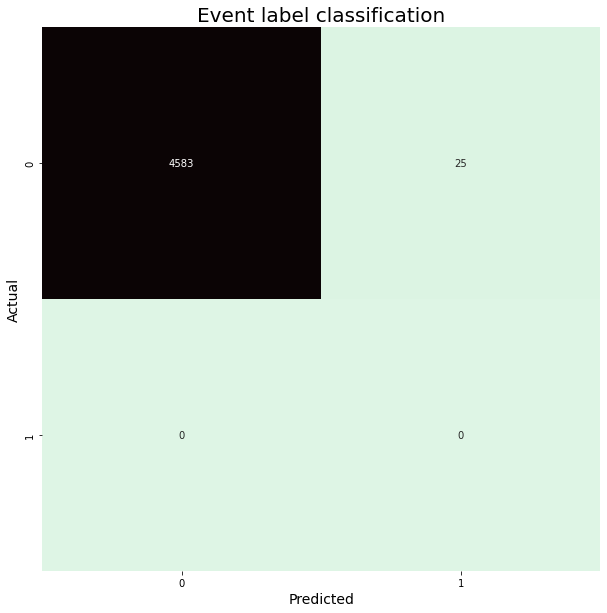

In [52]:
preds = event_label_baseline["event_label_preds"][23].split(',')
labels = event_label_baseline["event_label_labels"][23].split(',')


def clean_value(value):
    # Remove all brackets, commas, and whitespace
    value = ''.join(c for c in value if c.isdigit())
    return int(value) if value in ['0', '1'] else None  # Or raise error if unexpected

new_preds = [clean_value(v) for v in preds if clean_value(v) is not None]
new_labels = [clean_value(v) for v in labels if clean_value(v) is not None]

print(labels) 

cm = confusion_matrix(new_labels, new_preds)

class_names = ['0', '1']

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='mako_r', xticklabels=class_names, yticklabels=class_names, cbar=False)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Event label classification', fontsize=20)

### Forgetting curve

### Total learning curve

4.0


(0.0, 220.0)

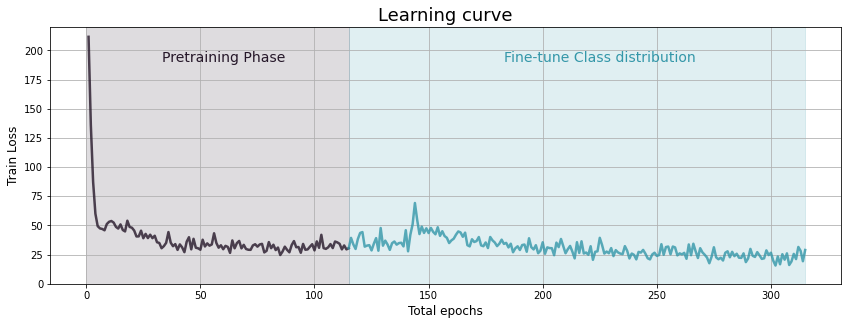

In [64]:
# pretrain
loss_pretrain = np.array(pretrain_data['train_loss'])
num_epochs_pretrain = 115
steps_per_epoch = len(loss_pretrain) / num_epochs_pretrain
train_loss_pretrain = loss_pretrain[::int(steps_per_epoch)]

# finetune 1: class_dist_baseline
class_dist_baseline_train_loss = np.array(class_dist_baseline['train_loss'])
num_epochs_finetune_1 = 200
steps_per_epoch = len(class_dist_baseline_train_loss) / num_epochs_finetune_1
train_loss = np.concatenate((train_loss_pretrain, class_dist_baseline_train_loss[::int(steps_per_epoch)]))

# # finetune 2: event_label_baseline
# event_label_baseline_train_loss = np.array(event_label_baseline['train_loss'])
# num_epochs_finetune_2 = 12 # 40
# steps_per_epoch = len(event_label_baseline_train_loss) / num_epochs_finetune_2
# train_loss = np.concatenate((train_loss_pretrain, event_label_baseline_train_loss[::int(steps_per_epoch)]))


print(steps_per_epoch)

num_epochs_total = num_epochs_pretrain + num_epochs_finetune_1
epochs = np.arange(1, num_epochs_total + 1)

line_color = cmap(0.5)
pretrain_shade_color = cmap(0.1)
finetune_1_shade_color = cmap(0.6)

# -----------------------------------------PLOTTING--------------------------------------------
width = 7.086
height = width / 3  # or / 2.5, / 2 depending on your aesthetic

plt.figure(figsize=(2*width, 2*height))
# plt.figure(figsize=(12, 4))

# pretrain
plt.axvspan(0, num_epochs_pretrain, color=pretrain_shade_color, alpha=0.15, label='Pretrain phase')
plt.text(x=60, y=max(train_loss) * 0.9, s="Pretraining Phase", fontsize=14, color=pretrain_shade_color, ha='center')

# # class dist
# plt.axvspan(num_epochs_pretrain, num_epochs_total, color=finetune_1_shade_color, alpha=0.15, label='Fine-tune Class Distribution')
# plt.text(x=225, y=max(train_loss) * 0.9, s="Fine-tune Class Distribution", fontsize=14, color=finetune_1_shade_color, ha='center')

# event label
plt.axvspan(num_epochs_pretrain, num_epochs_total, color=finetune_1_shade_color, alpha=0.15, label='Fine-tune Class distribution')
plt.text(x=225, y=max(train_loss) * 0.9, s="Fine-tune Class distribution", fontsize=14, color=finetune_1_shade_color, ha='center')


plt.plot(epochs[:num_epochs_pretrain], train_loss[:num_epochs_pretrain], label='Train Loss (Pretrain)',color=pretrain_shade_color, linewidth=2.5, alpha=0.8)
plt.plot(epochs[num_epochs_pretrain - 1:], train_loss[num_epochs_pretrain - 1:], label='Train Loss (Finetune)', color=finetune_1_shade_color, linewidth=2.5, alpha=0.8)
plt.title('Learning curve', fontsize=18)
plt.xlabel('Total epochs', fontsize=12)    
plt.ylabel('Train Loss', fontsize=12)
plt.grid(True)
plt.ylim(0, 220)
# plt.yscale('log')

In [ ]:
# FÖR FAKTISKA FIGURER!

plt.savefig("learning_curve.png", dpi=300, bbox_inches='tight')
